<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


- In this lab, I will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 113.0 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 112.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 121.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 74.5 MB/s eta 0:00:00


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-10-14 16:11:13--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  64.4MB/s    in 2.4s    

2025-10-14 16:11:15 (64.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



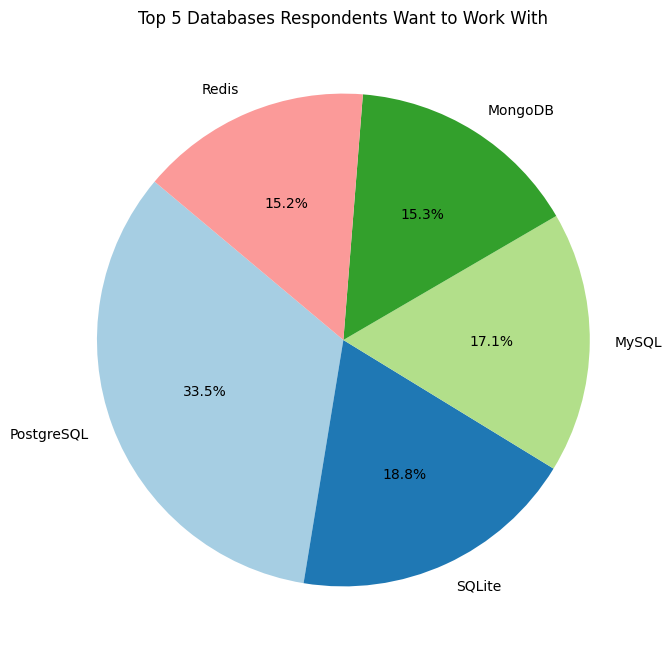

In [4]:
# Split multiple database entries per respondent into separate values
db_series = df['DatabaseWantToWorkWith'].dropna().str.split(';')

# Flatten the list and count the frequency of each database
db_counts = pd.Series([db for sublist in db_series for db in sublist]).value_counts()

# Select the top 5 most desired databases
top_5_dbs = db_counts.head(5)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_dbs,
    labels=top_5_dbs.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)

plt.title("Top 5 Databases Respondents Want to Work With")
plt.show()


The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



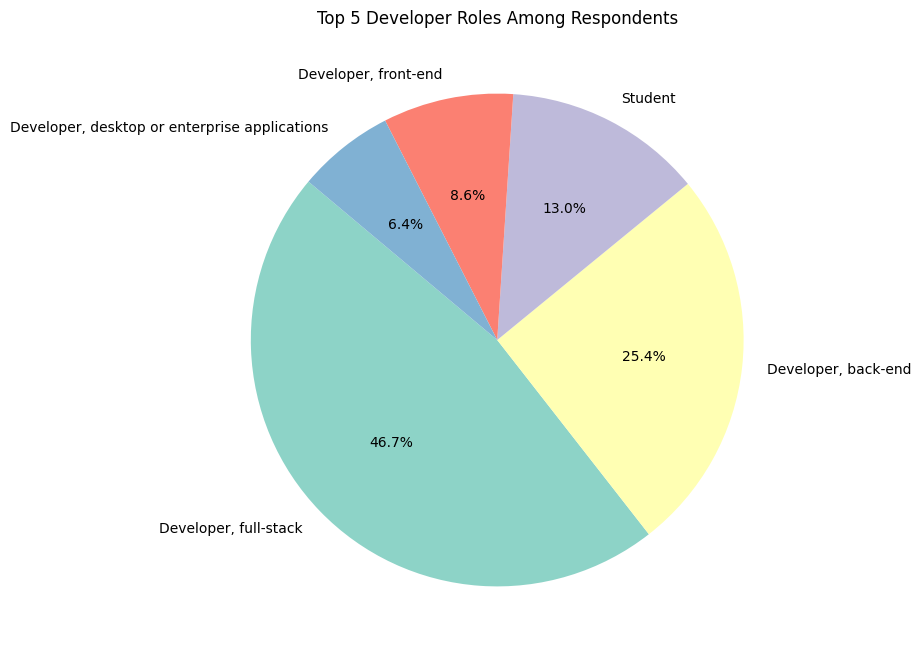

In [5]:
# Split multiple roles per respondent into separate entries
dev_series = df['DevType'].dropna().str.split(';')

# Flatten the list and count the frequency of each developer role
dev_counts = pd.Series([role for sublist in dev_series for role in sublist]).value_counts()

# Select the top 5 most common developer roles
top_5_roles = dev_counts.head(5)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_roles,
    labels=top_5_roles.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)

plt.title("Top 5 Developer Roles Among Respondents")
plt.show()


##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



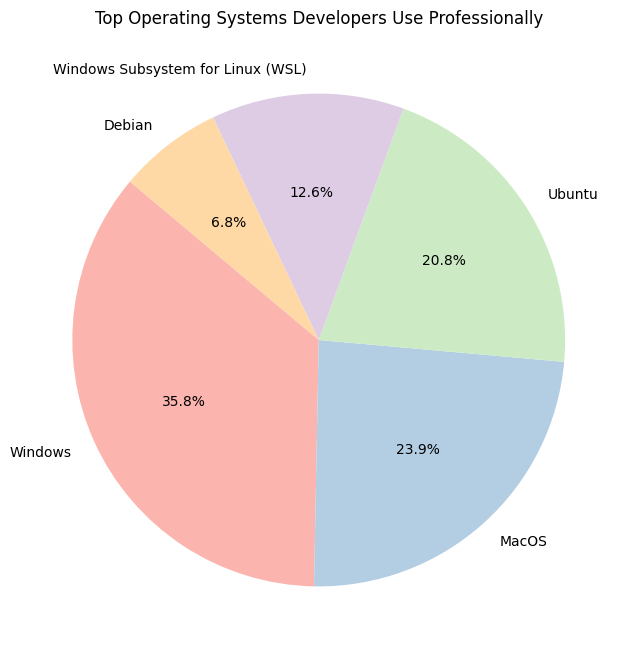

In [6]:

# Split multiple OS entries per respondent into separate values
os_series = df['OpSysProfessional use'].dropna().str.split(';')

# Flatten the list and count how many times each OS appears
os_counts = pd.Series([os for sublist in os_series for os in sublist]).value_counts()

# Select the top 5 operating systems (you can adjust if fewer/more categories are preferred)
top_os = os_counts.head(5)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_os,
    labels=top_os.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)

plt.title("Top Operating Systems Developers Use Professionally")
plt.show()


### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



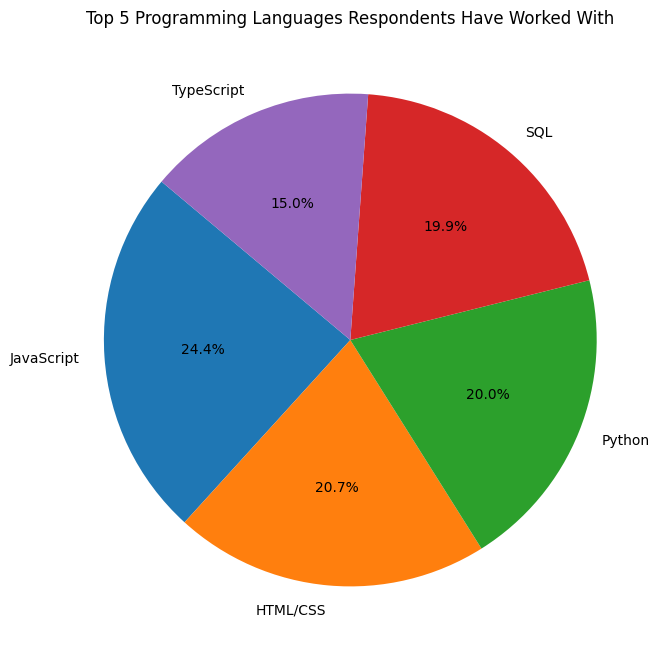

In [7]:
# Split multiple language entries per respondent into separate values
lang_series = df['LanguageHaveWorkedWith'].dropna().str.split(';')

# Flatten the list and count the frequency of each language
lang_counts = pd.Series([lang for sublist in lang_series for lang in sublist]).value_counts()

# Select the top 5 most common languages
top_5_langs = lang_counts.head(5)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_langs,
    labels=top_5_langs.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab10.colors
)

plt.title("Top 5 Programming Languages Respondents Have Worked With")
plt.show()


##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



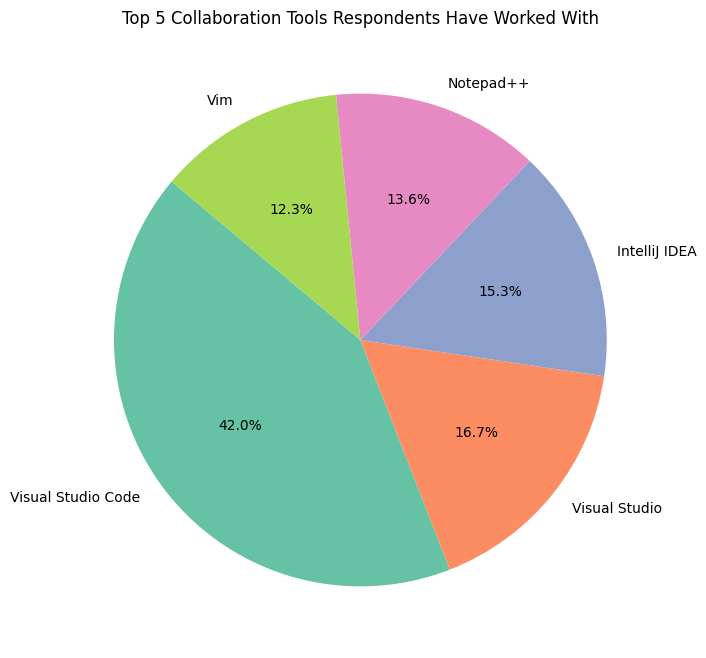

In [8]:
# Split multiple collaboration tools per respondent into separate entries
collab_series = df['NEWCollabToolsHaveWorkedWith'].dropna().str.split(';')

# Flatten the list and count occurrences of each collaboration tool
collab_counts = pd.Series([tool.strip() for sublist in collab_series for tool in sublist]).value_counts()

# Select the top 5 collaboration tools
top_5_collab = collab_counts.head(5)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_collab,
    labels=top_5_collab.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set2.colors
)

plt.title("Top 5 Collaboration Tools Respondents Have Worked With")
plt.show()


### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



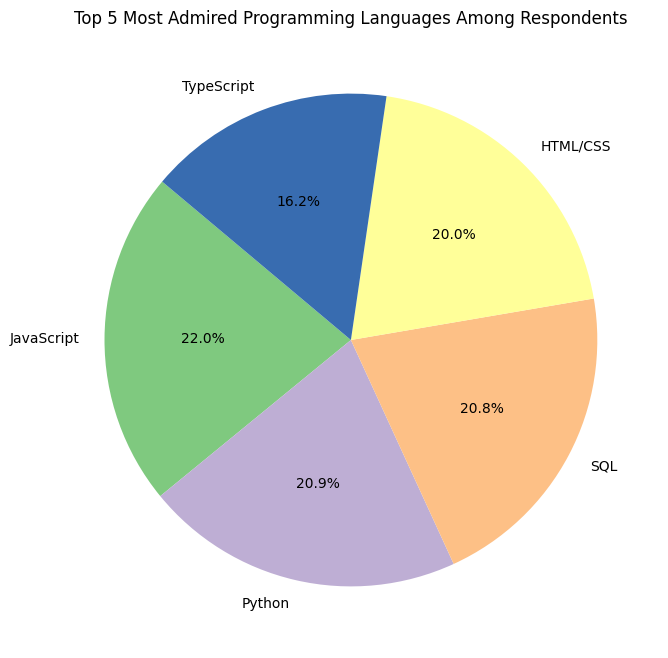

In [9]:
# Split multiple admired languages per respondent into separate entries
admired_series = df['LanguageAdmired'].dropna().str.split(';')

# Flatten the list and count the frequency of each language
admired_counts = pd.Series([lang.strip() for sublist in admired_series for lang in sublist]).value_counts()

# Select the top 5 most admired languages
top_5_admired = admired_counts.head(5)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_admired,
    labels=top_5_admired.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Accent.colors
)

plt.title("Top 5 Most Admired Programming Languages Among Respondents")
plt.show()


##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



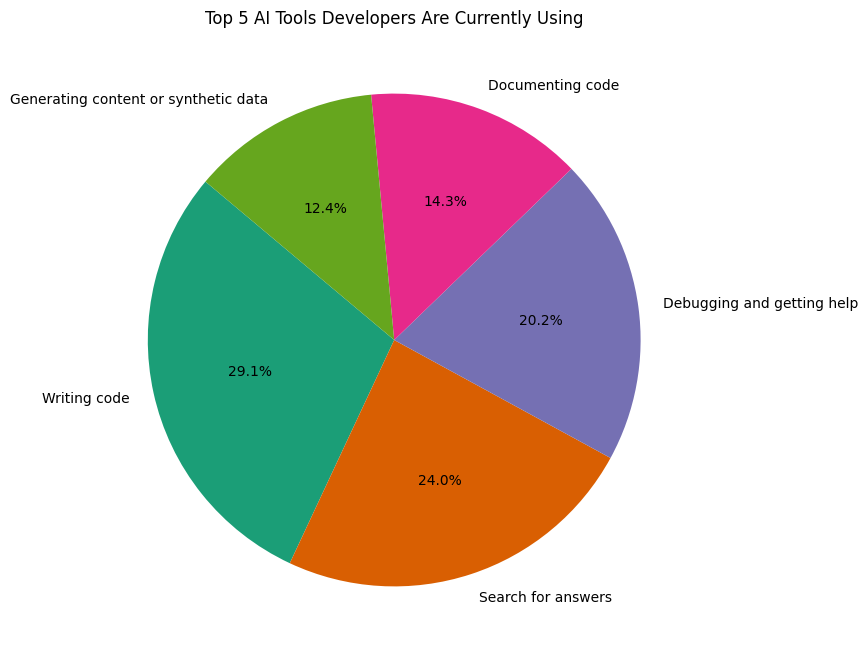

In [14]:
# Split multiple AI tools per respondent into separate entries
ai_tools_series = df['AIToolCurrently Using'].dropna().str.split(';')

# Flatten the list and count the frequency of each tool
ai_tools_counts = pd.Series([tool.strip() for sublist in ai_tools_series for tool in sublist]).value_counts()

# Select the top 5 most used AI tools
top_5_ai_tools = ai_tools_counts.head(5)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_ai_tools,
    labels=top_5_ai_tools.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Dark2.colors
)

plt.title("Top 5 AI Tools Developers Are Currently Using")
plt.show()


##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



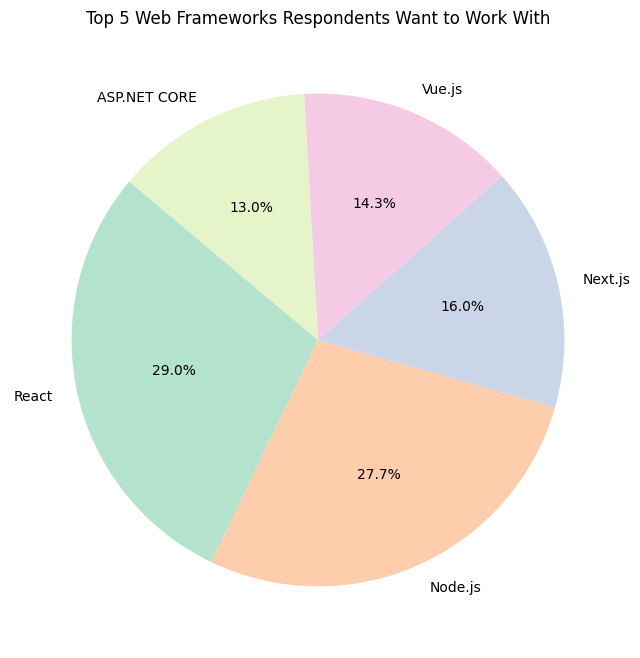

In [15]:
# Split multiple frameworks per respondent into separate entries
webframe_series = df['WebframeWantToWorkWith'].dropna().str.split(';')

# Flatten the list and count the frequency of each framework
webframe_counts = pd.Series([framework.strip() for sublist in webframe_series for framework in sublist]).value_counts()

# Select the top 5 most desired web frameworks
top_5_webframes = webframe_counts.head(5)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_webframes,
    labels=top_5_webframes.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel2.colors
)

plt.title("Top 5 Web Frameworks Respondents Want to Work With")
plt.show()


##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



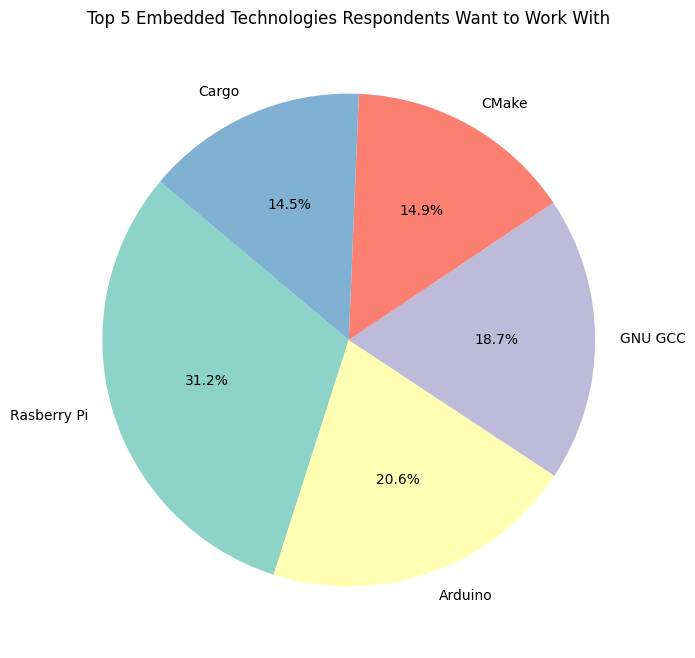

In [16]:
# Split multiple embedded technologies per respondent into separate entries
embedded_series = df['EmbeddedWantToWorkWith'].dropna().str.split(';')

# Flatten the list and count the frequency of each technology
embedded_counts = pd.Series([tech.strip() for sublist in embedded_series for tech in sublist]).value_counts()

# Select the top 5 most desired embedded technologies
top_5_embedded = embedded_counts.head(5)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_embedded,
    labels=top_5_embedded.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)

plt.title("Top 5 Embedded Technologies Respondents Want to Work With")
plt.show()


### Summary


After completing this lab, I will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
